<a href="https://colab.research.google.com/github/VarnikaKamra/ds-projects/blob/main/Indian%20Used%20Car%20Price%20Prediction/IndianUsedCarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Indian Used Car Price Prediction**

The aim of this project is to predict the price of the used cars in Indian metro cities by analyzin the car's features such as company, model, variant,fuel type, quality score and many more.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [3]:
df.info()

#Null values in Fuel Type,Transmission Type and CngKit


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


**Data Preprocessing**

In [4]:
df.shape

(1064, 19)

In [5]:
df.drop('Id',axis = 1,inplace = True)

In [6]:
df.columns

Index(['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

https://github.com/SUKHMAN-SINGH-1612/Data-Science-Projects/blob/main/Indian%20Used%20Car%20Price%20Prediction/Indian%20Used%20Car%20Price%20Prediction.ipynb

In [7]:
df['Price'].value_counts()

,count
Price,
6.25 Lakhs,22
6.75 Lakhs,20
4.5 Lakhs,20
8.5 Lakhs,19
7.5 Lakhs,17
...,...
16.2 Lakhs,1
9.16 Lakhs,1
21.49 Lakhs,1


In [8]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [9]:
#Null values percentage wise

df.isnull().sum()/df.shape[0]*100

,0
Company,0.000000
Model,0.000000
Variant,0.000000
FuelType,0.093985
Colour,0.000000
Kilometer,0.000000
BodyStyle,0.000000
TransmissionType,67.105263
ManufactureDate,0.000000
ModelYear,0.000000


-- Missing Values--

Fuel Type:Drop the rows with missing values in this, as they are very less.

CngKit: Most of the cars don't have CNG kit. Either replace na with 'No" or remove the column as the missing values are in majority

Transmission Type:Remove this column are 67% are missing.



In [10]:
df.drop('CngKit',axis =1,inplace =True)


In [11]:
df.drop('TransmissionType',axis =1,inplace =True)

In [12]:
df['FuelType'].dropna(inplace = True)

In [13]:
#Dropping ManufactureDate column, as Model Year column will generate the similar data

df.drop('ManufactureDate',axis =1,inplace =True)

In [14]:
df.drop('Variant',axis=1, inplace = True)

In [15]:
#Changing the model Year to age of car

df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns = {'ModelYear':'Age'},inplace = True)

In [16]:
for i in df.columns:
  print(i,df[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


In [17]:
df.describe()

,Kilometer,Age,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,6.135338,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,0.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,4.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,6.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,8.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,20.000000,8.500000e+06,1.000000,9.400000


Exploratory Data Analysis

-- Look at the distribution of data across all columns in order to understand the data in a better way.



-- Relationship between the target variable and the independent variables

<ipython-input-18-f8469ad473ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Company'],order = df['Company'].value_counts().index,palette ='Set1')


<Axes: xlabel='count', ylabel='Company'>

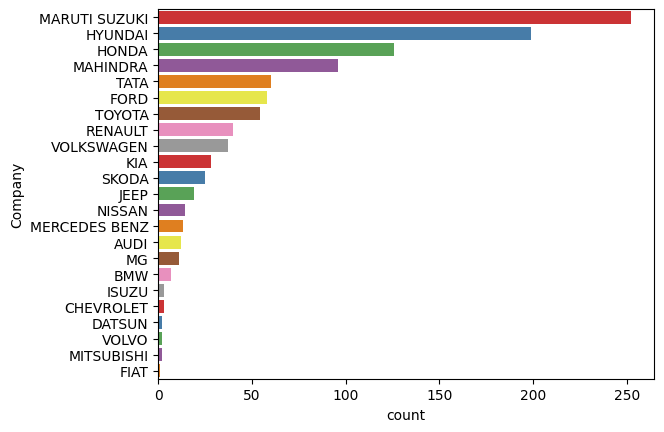

In [18]:
#Number of cars by company
sns.countplot(df['Company'],order = df['Company'].value_counts().index,palette ='Set1')

This graph depicts the distribution of cars in the dataset from different companies. Out of 23 companies, Maruti Suzuki, Hyundai, Honda, Mahindra and Tata are top 5 companies with resaling cars.

Therefore, we can assume that these company's car are more durable and have a good resale value.

<ipython-input-19-715c02c7bc9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Model'],order = df['Model'].value_counts().index[:10],palette ='Set1')


<Axes: xlabel='count', ylabel='Model'>

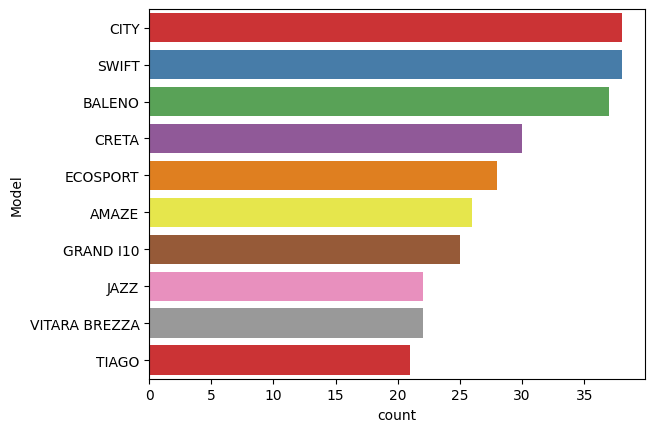

In [19]:
#Top 10 car models

sns.countplot(df['Model'],order = df['Model'].value_counts().index[:10],palette ='Set1')

These car models are more durable and have a good resale value. Also, Honda City and Swift are more in demand in the used car market.

<ipython-input-20-f304ba5bf51e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['FuelType'],order = df['FuelType'].value_counts().index,palette ='Set1').set_title("Car Fuel Type")


Text(0.5, 1.0, 'Car Fuel Type')

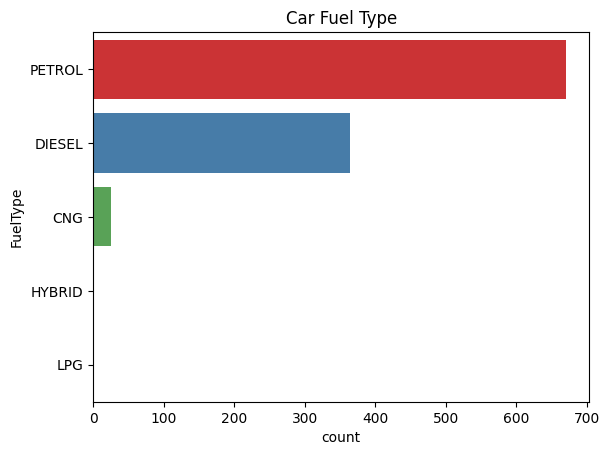

In [20]:
#Car Fuel Type

sns.countplot(df['FuelType'],order = df['FuelType'].value_counts().index,palette ='Set1').set_title("Car Fuel Type")

Majority of cars on resale have petrol engine (More than 650) followed by Diesel.
Very few are CNG and negligible are hybrid or on LPG.

Therefore, we can assume that petrol and diesel cars are more in demand in the used car market.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

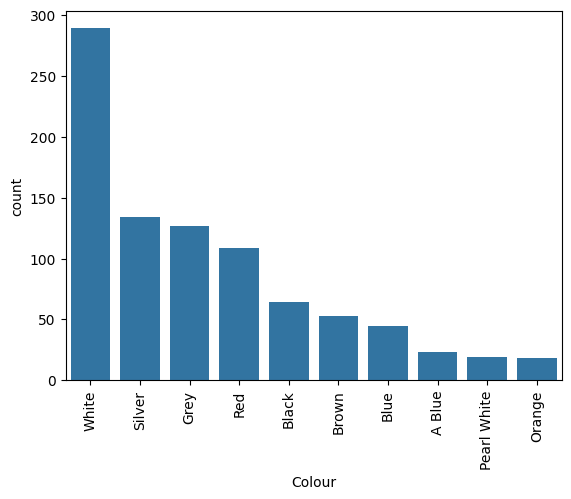

In [21]:
#Top 10 colors for car

sns.countplot(x='Colour',data =df,order = df['Colour'].value_counts().index[:10])
plt.xticks(rotation = 90)

Although colour has no significant impact on the car's performance, it still plays a major role in the car demand. Therefore, we can safely assume that white, silver, grey, red and black cars have good resale value.

Text(0.5, 1.0, 'Odometer Reading Distribution')

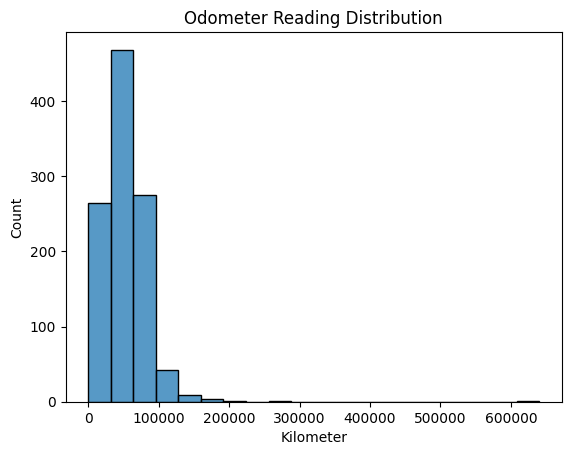

In [22]:
#Odometer readinf distribution

sns.histplot(x='Kilometer',data =df,bins=20).set_title("Odometer Reading Distribution")

Cars with odometer reading less than 100000 are more in demand in the used car market.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

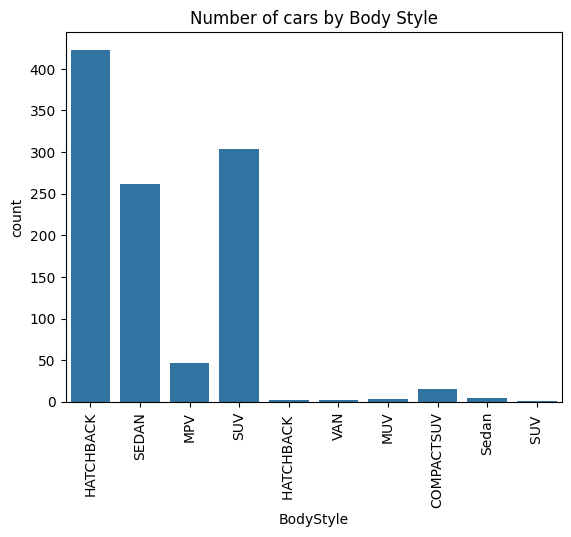

In [23]:
#Body Style

sns.countplot(x = 'BodyStyle', data = df).set_title('Number of cars by Body Style')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Car Age Distribution')

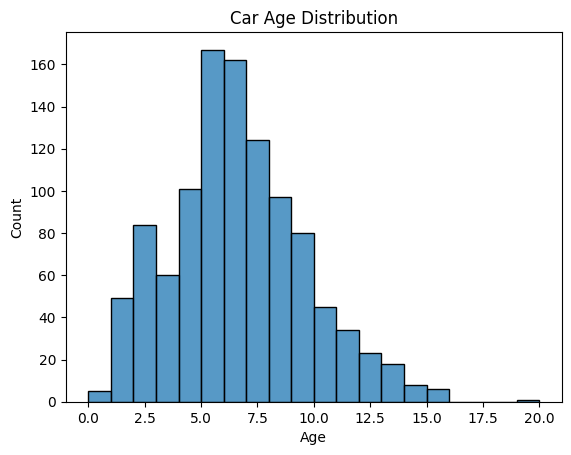

In [24]:
#Car Age Distribution

sns.histplot(x='Age',data=df,bins=20).set_title("Car Age Distribution")

Car's age is defintely an important parameter in deciding its resale value. Hence, majority of cars are between 5-7 years.

There are still significant number of cars with age less than 5 years, they would have higher resale value.

In addition to that, there is a car of 20 years, which could be an outlier.

In [25]:
df.columns

Index(['Company', 'Model', 'FuelType', 'Colour', 'Kilometer', 'BodyStyle',
       'Age', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

Text(0.5, 1.0, 'Price Distribution')

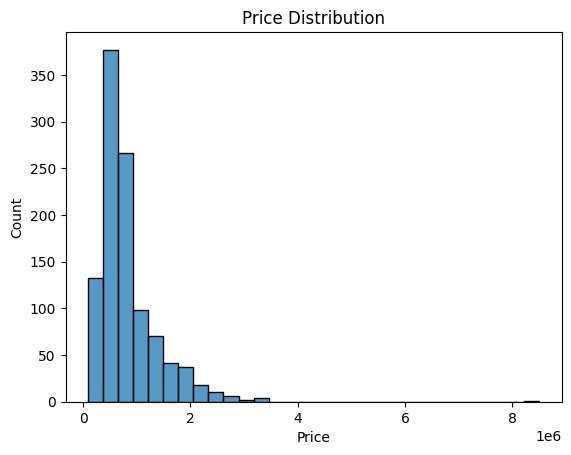

In [26]:
#Price distribution

sns.histplot(x='Price',data =df, bins =30).set_title("Price Distribution")

<ipython-input-27-90de27073d11>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
<ipython-input-27-90de27073d11>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
<ipython-input-27-90de27073d11>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

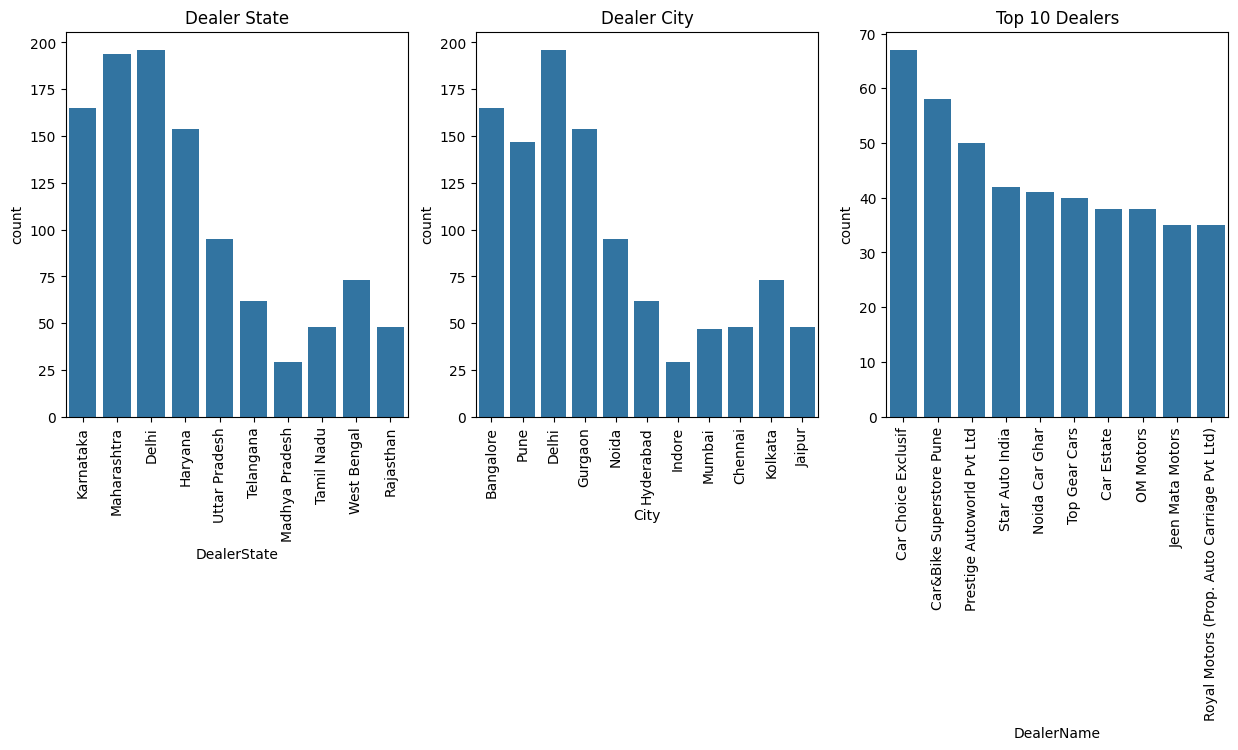

In [27]:
#Location based Distribution

fig,ax = plt.subplots(1,3,figsize=(15,5))

#Dealer State
sns.countplot(x='DealerState',data =df,ax=ax[0]).set_title("Dealer State")
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)

#Dealer City
sns.countplot(x='City',data =df,ax=ax[1]).set_title("Dealer City")
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)

#Top 10 dealers

sns.countplot(x='DealerName',data=df,order=df['DealerName'].value_counts().index[:10]).set_title("Top 10 Dealers")
ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation = 90)

Text(0.5, 1.0, 'Car Owner Type')

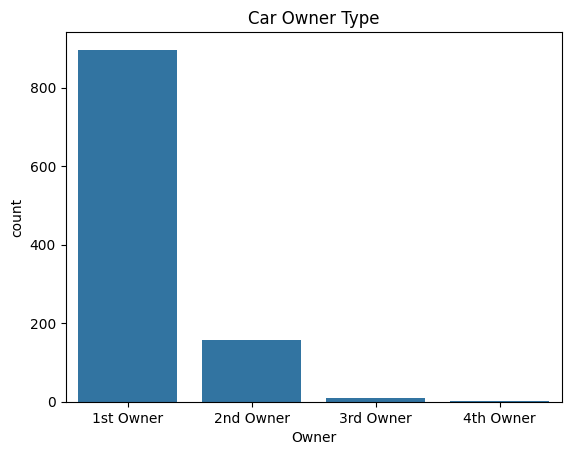

In [28]:
#Car Owner Type

sns.countplot(x='Owner',data=df).set_title("Car Owner Type")

First Car Owner cars are more preferred in the used car market and have a good resale value.

Text(0.5, 1.0, 'Warranty')

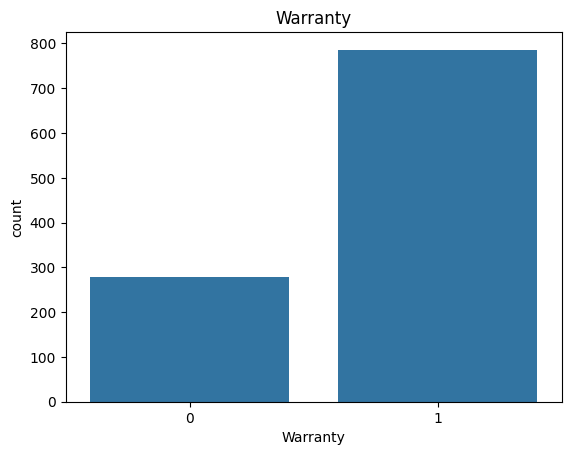

In [29]:
#Warranty

sns.countplot(x='Warranty',data=df).set_title("Warranty")

No. of cars with warranty are preferred (almost twice) that the ones without warranty

Text(0.5, 1.0, 'Quality Score Distribution')

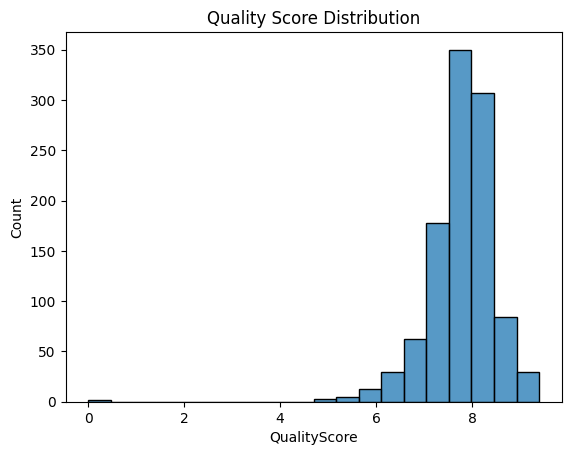

In [30]:
#Quality Score distribution

sns.histplot(x='QualityScore',data=df,bins=20).set_title("Quality Score Distribution")

Cars with higher quality scores tend to have a higher resale value and are preferred more by the customers.

**Relationship between Car Price and other independent variables**

Text(0.5, 1.0, 'Top 10 car companies by Price')

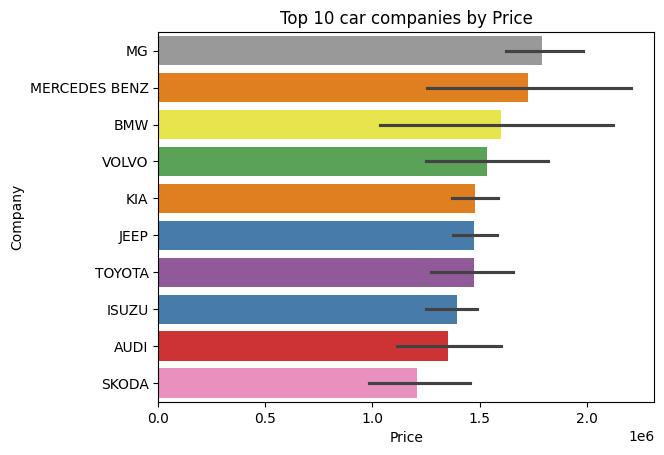

In [31]:
#Top 10 car companies by Price

sns.barplot(y='Company',x='Price',data=df,order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index,hue='Company',palette='Set1').set_title("Top 10 car companies by Price")

This graphs highlights the top 10 car companies in the dataset with the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies. The list also includes Volvo. followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features.

Moreover, my prevous hypothesis, about the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they are not in the top 10 list. This means that these companies cars are in greater number due to their demand because of low price

Text(0.5, 1.0, 'Top 10 car Models by price')

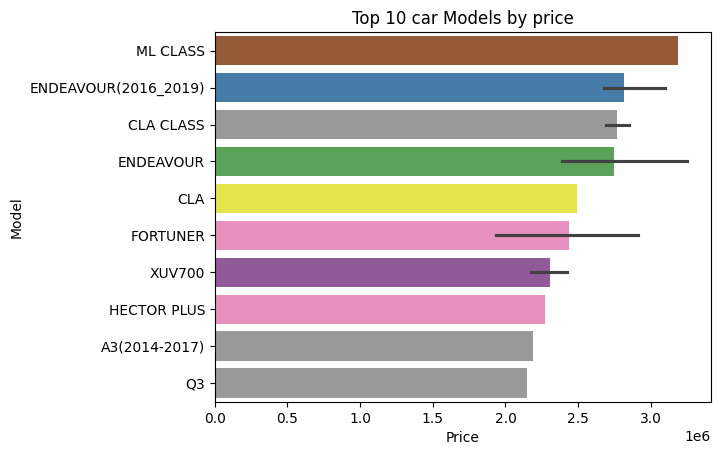

In [32]:
#Top 10 car models by price

sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Model', palette= 'Set1').set_title('Top 10 car Models by price')


This graph shows the relation between the car model and it resale value and we can see that it shows similarity woth the previous graph. The car models - ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value, followed by CLA, Fortuner and XUV700. Like the previous graph, the audi model A3 is at the 9th position with a much lower resale value as compared to the other models.

In the car model also my hypothesis was wrong as I assummed that Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we came to know that these car in higher number due to their high demnad because of low price.

Text(0.5, 1.0, 'Price by Fuel Type')

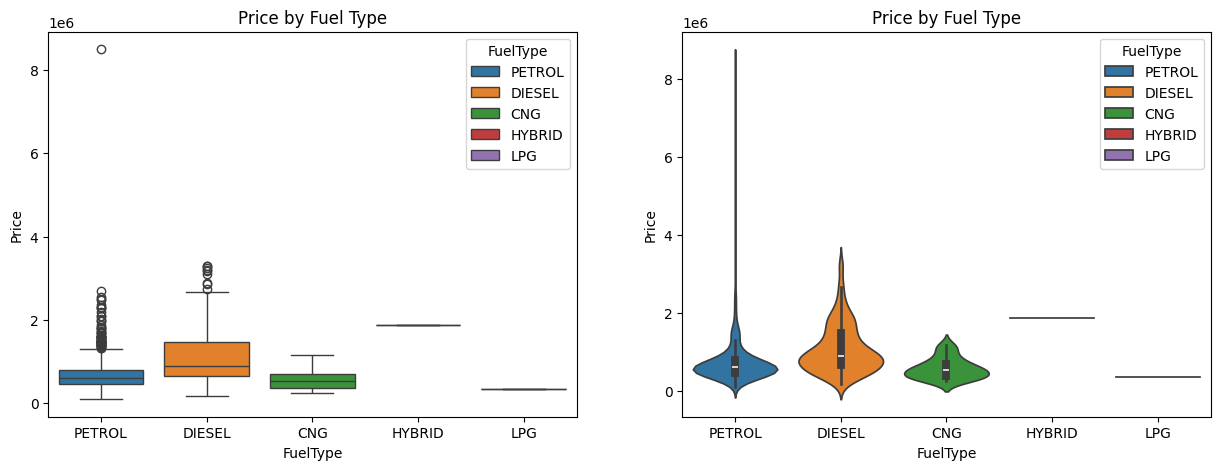

In [33]:
#Car Fuel Type and Price

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('Price by Fuel Type')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('Price by Fuel Type')

The above plots visualizes the relationship between the car fuel type and its resale value. In the boxplot we can see than cars with diesel fuel type have higher resale value than petrol and CNG and LPG. In the violin plot, we can see that the distribution of the price for diesel cars is more concentrated as compared to Petrol. From this it is cleared that, customers prefer petrol and diesel car than other fuel type and the diesel cars are more in demand in the used car market

Text(0.5, 1.0, 'Top 10 Car Colors by Price')

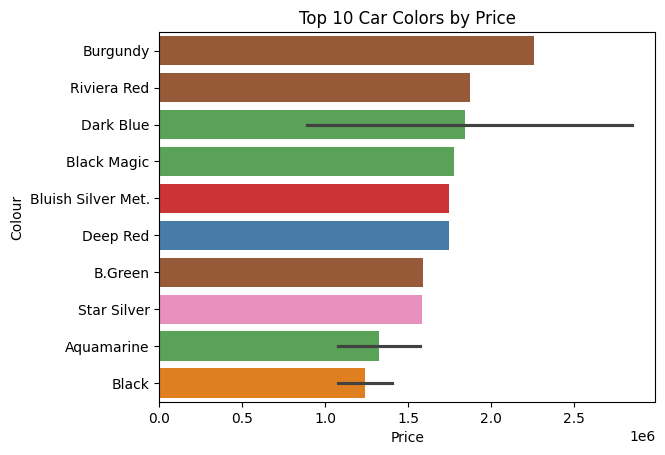

In [34]:
#Top 10 Car Colors by price

sns.barplot(y='Colour',x='Price',data=df,order = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index,hue='Colour',palette='Set1').set_title("Top 10 Car Colors by Price")

The cars with colors like Burgundy, Riviera Red and Dark Blue have higher resale value as compared to other colors. This shows that color of the car does matter and plays a major role in the resale value of the car.

Moreover, we also came to know that exotic colors have more price but they are not in demand in the used car market.

Text(0.5, 1.0, 'Odometer Reading and Price')

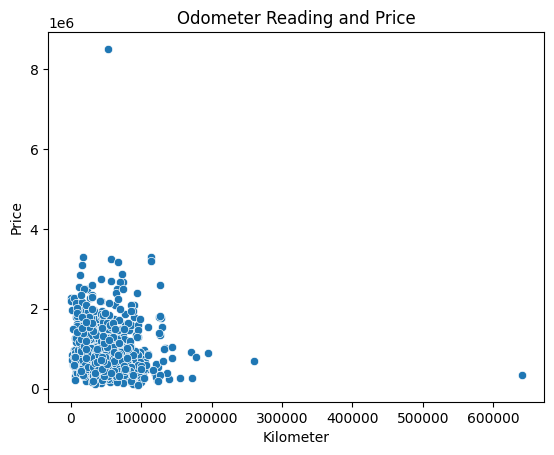

In [35]:
#Odometer Reading and Price

sns.scatterplot(x='Kilometer',y='Price',data=df).set_title("Odometer Reading and Price")


In the scatter plot we can see than the data is concentrated near the origin, which means that most of the cars have odometer reading less than 100000 km. In addition to that the cars with less odometer reading shows higher resale value and as the odometer reading increases the resale value decreases. Therefore, my hypothesis was correct that cars with odometer reading less than 100000 km are more in demand in the used car market will have a good resale value.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

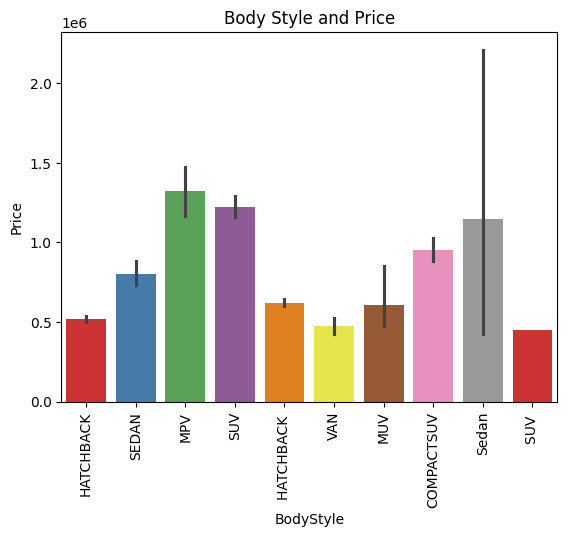

In [36]:
#Body style and Price

sns.barplot(x='BodyStyle',y='Price',data=df,hue='BodyStyle',palette='Set1').set_title("Body Style and Price")
plt.xticks(rotation=90)


MPV, SUV and Sedan are the top 3 car body styles with the highest resale value. Therefore, we can assume that these body styles are more preferred in the used car market and have a good resale value. This also shows that my assumption was correct however, the Hatchback body style cars despite being in majority have lower resale value.

Text(0.5, 1.0, 'Car Age and Price')

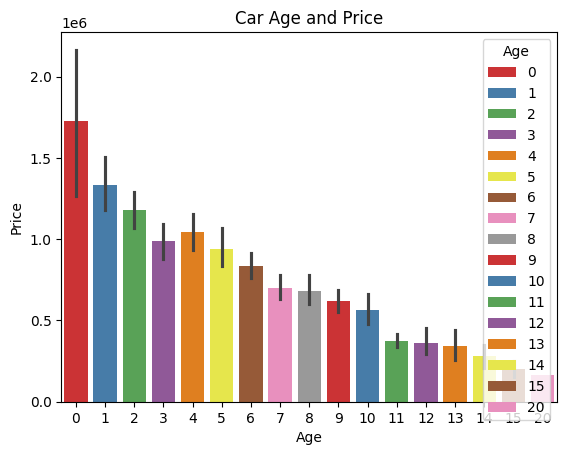

In [37]:
#Car Age and Price

sns.barplot(x='Age',y='Price',data=df,hue='Age',palette='Set1').set_title("Car Age and Price")


As we discussed earlier, age is a key determinant for a car's resale value and this graph clearly visulaizes the relation of the age with car price. The cars with age less than a year has then highest price and as the age increases the prices decreases gradually. Therefore, my hypothesis was correct that cars with age less than 5 years have higher resale value.

<ipython-input-38-ee35af413cbc>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
<ipython-input-38-ee35af413cbc>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
<ipython-input-38-ee35af413cbc>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

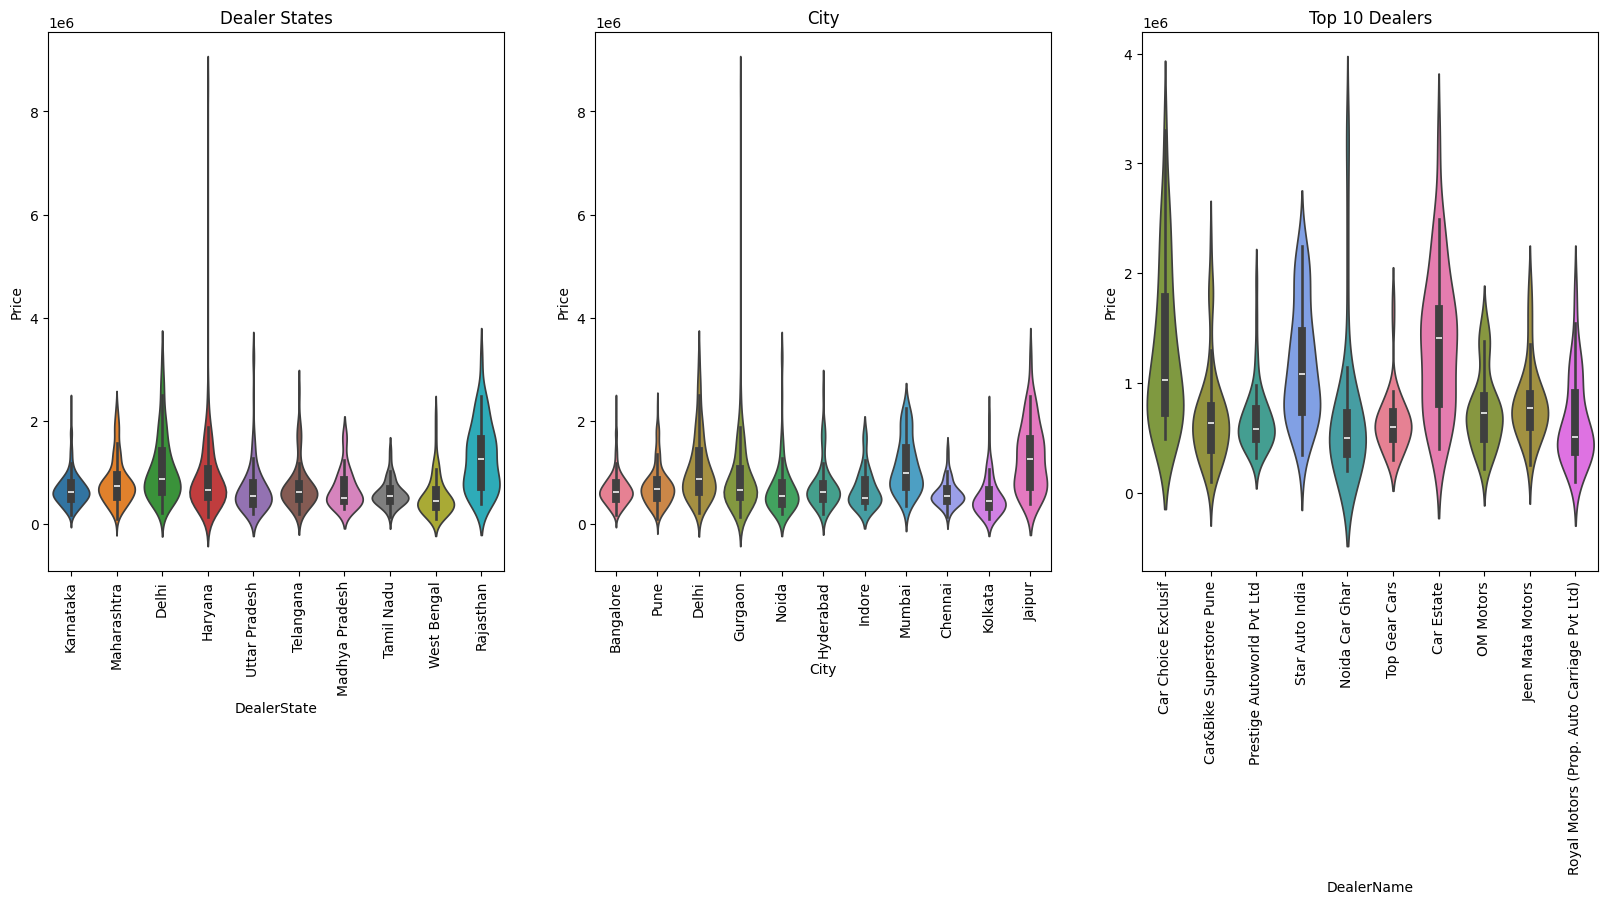

In [38]:
#Location based Price Distribution

fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

In the above graph we can see the price distribution based on the state, city and the dealer name. In the state graph, we can see that the cars in Rajastan have the highest price followed by Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Haryana. In the city graph, we can see that the cars in Jaipur have the highest price followed by Mumbai and Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Gurgaon. In the dealer name graph, we can see the top 10 dealers along with their price distribution. Here, Car Estate has the highest price followed by Star Auto India and Car Choice. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Noida Car Ghar

Text(0.5, 1.0, 'Price by Owner Type')

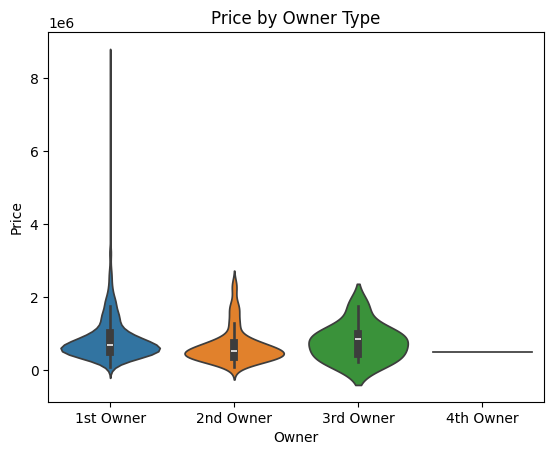

In [39]:
#Car Owner Type and Price

sns.violinplot(x = 'Owner', y = 'Price', data = df, hue = 'Owner').set_title('Price by Owner Type')


The graph shows the price distribution with respect to the car owner type. The cars with 1st owner have the highest price which is obvious as they are new cars. However, the 3rd Owner type cars depite being less in number have higher price than 2nd Owner type cars, which is not obvious. Therefore, we can assume that 3rd Owner type cars having higher price could some luxury or vintage cars.

Text(0.5, 1.0, 'Price by Warranty')

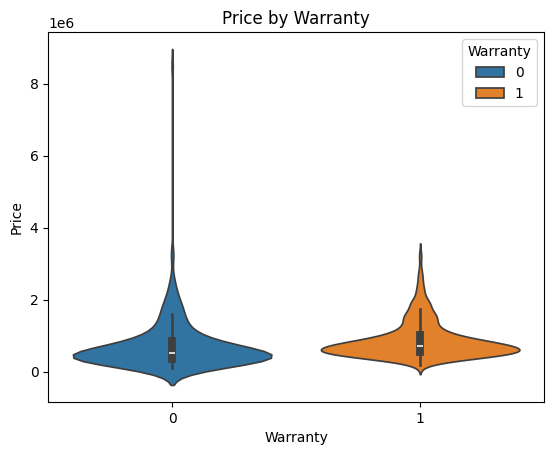

In [40]:
#Warranty and Price

sns.violinplot(x = 'Warranty', y = 'Price', data = df, hue = 'Warranty').set_title('Price by Warranty')


Here, we can see some change in the violinplot of the cars with and without warranty. The cars with warranty tends to have slightly higher price than the cars without warranty. Therefore, we can assume that cars with warranty are more preferred in the used car market and have a good resale value.

Text(0.5, 1.0, 'Quality Score and Price')

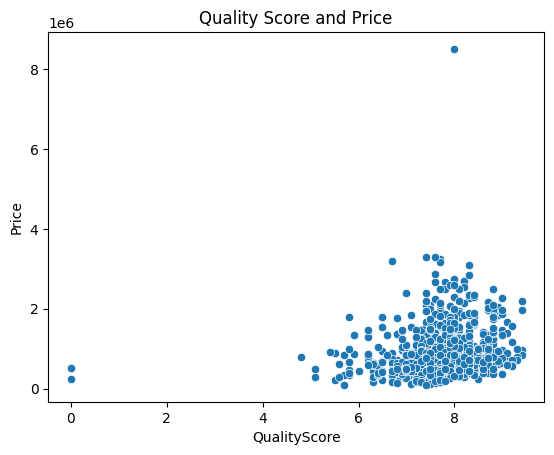

In [41]:
#Quality Score and Price
sns.scatterplot(x = 'QualityScore', y = 'Price', data = df).set_title('Quality Score and Price')



We can see a very high concentration near the quality score 7 and above having much higher price than the cars with quality score less than 7. Therefore, we can assume that cars with quality score 7 and above are more preferred in the used car market and have a good resale value.



https://github.com/SUKHMAN-SINGH-1612/Data-Science-Projects/blob/main/Indian%20Used%20Car%20Price%20Prediction/Indian%20Used%20Car%20Price%20Prediction.ipynb

Data PreProcessing Part 2

In [42]:
df['Model'].value_counts()

,count
Model,
CITY,38
SWIFT,38
BALENO,37
CRETA,30
ECOSPORT,28
...,...
E-CLASS(2013-2015),1
VIRTUS,1
ACCORD,1


In [43]:
df['Model'].nunique()

218

In [44]:
#Dropping the Model column because it has too many unique values and it will increase the dimensionality of the dataset

df.drop('Model',axis =1,inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1064 non-null   object 
 1   FuelType      1063 non-null   object 
 2   Colour        1064 non-null   object 
 3   Kilometer     1064 non-null   int64  
 4   BodyStyle     1064 non-null   object 
 5   Age           1064 non-null   int64  
 6   Price         1064 non-null   float64
 7   Owner         1064 non-null   object 
 8   DealerState   1064 non-null   object 
 9   DealerName    1064 non-null   object 
 10  City          1064 non-null   object 
 11  Warranty      1064 non-null   int64  
 12  QualityScore  1064 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 108.2+ KB


Label Encoding

In [46]:
#Columns for label encoding

#selecting columns with object datatype


cols = df.select_dtypes(include='object').columns
cols

Index(['Company', 'FuelType', 'Colour', 'BodyStyle', 'Owner', 'DealerState',
       'DealerName', 'City'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cols:
  df[i] = le.fit_transform(df[i])
  print(i,df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


Outlier Removal

In [52]:
#Using IQRS to remove outlier

cols = df.select_dtypes(include =['int64','float64']).columns

Q1 = df[cols].quantile(0.25)
Q3 =df[cols].quantile(0.75)

IQR = Q3-Q1

#Removing outliers

df = df[~((df[cols]<( Q1 - 1.5 * IQR)) | (df[cols]> (Q3 + 1.5 *IQR))).any(axis=1)]

Correlation Matrix Heatmap

<Axes: >

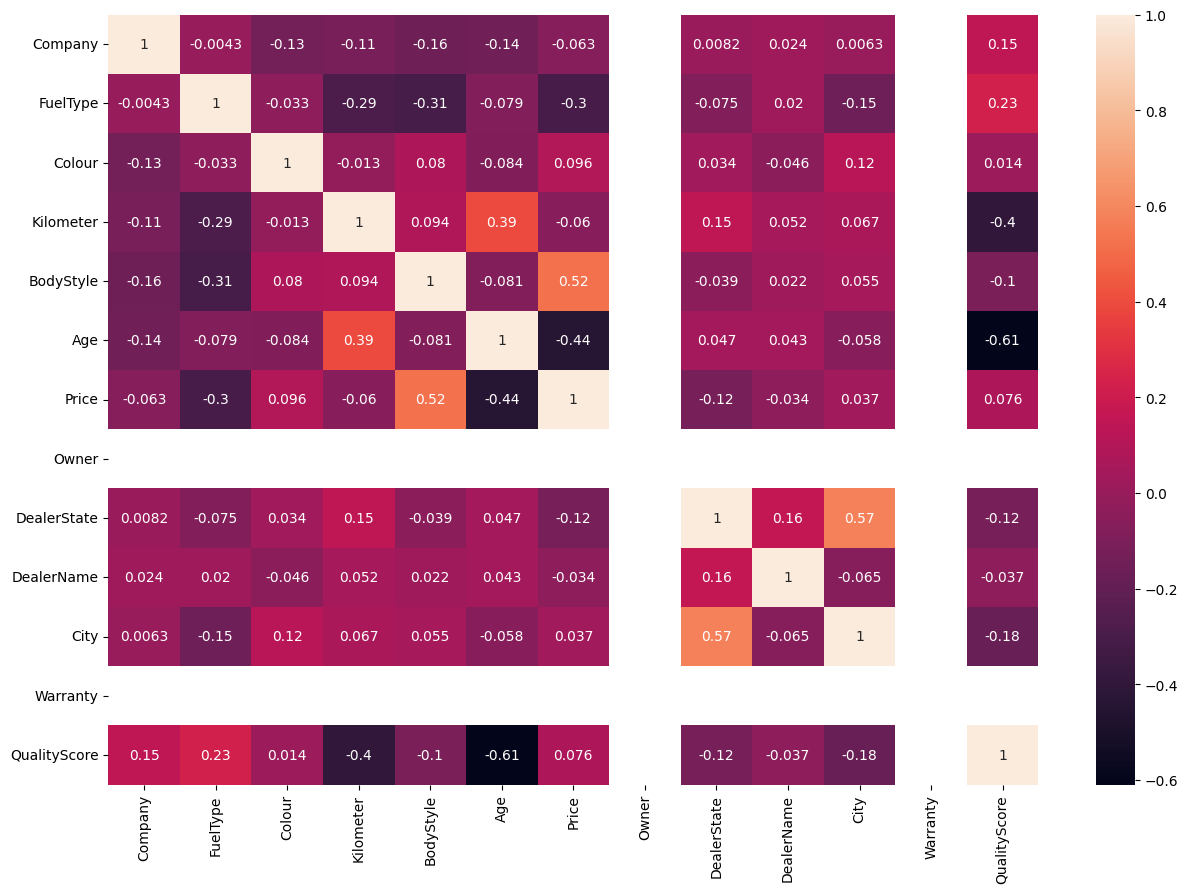

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [56]:
#Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Price',axis =1)
y = df['Price']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Model Building

-- Decision Tree Regressor

-- Random Forest Regressor

-- Ridge Regressor

In [58]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

dt = DecisionTreeRegressor()

In [59]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

para = {
    'max_depth':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'random_state':[0,42]
}

grid = GridSearchCV(dt,param_grid=para,cv=5)

#Fitting the model
grid.fit(X_train,y_train)
#Best parameters
print(grid.best_params_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


In [60]:
#Decision Tree Regressor with the best parameters

dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=8, random_state=42)
dtr.fit(X_train,y_train)

#Training score

print(dtr.score(X_train,y_train))


0.7486520784769929


In [62]:
#Prediction

dtr_pred = dtr.predict(X_test)

In [63]:
#Random forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [64]:
#Hyperprameter tuning
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

grid = GridSearchCV(rfr,param_grid=para,cv=5,n_jobs=-1,verbose = 2)

#Fitting the model
grid.fit(X_train,y_train)
#Best parameters
print(grid.best_params_)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [65]:
rfr = RandomForestRegressor(max_depth =8,min_samples_leaf=2,min_samples_split=2, random_state =42)

rfr.fit(X_train,y_train)

#Training score
print(rfr.score(X_train,y_train))

0.8865525162656441


In [66]:
rfr_pred = rfr.predict(X_test)

Model Evaluation

<ipython-input-69-aa37b9d97b90>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y_test,ax=ax[0],color ='r',hist = False,label ='Actual').set_title("Decision Tree Regressor")
<ipython-input-69-aa37b9d97b90>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtr_pred,ax=ax[0],co

<Axes: title={'center': 'Random Forest Regressor'}, ylabel='Density'>

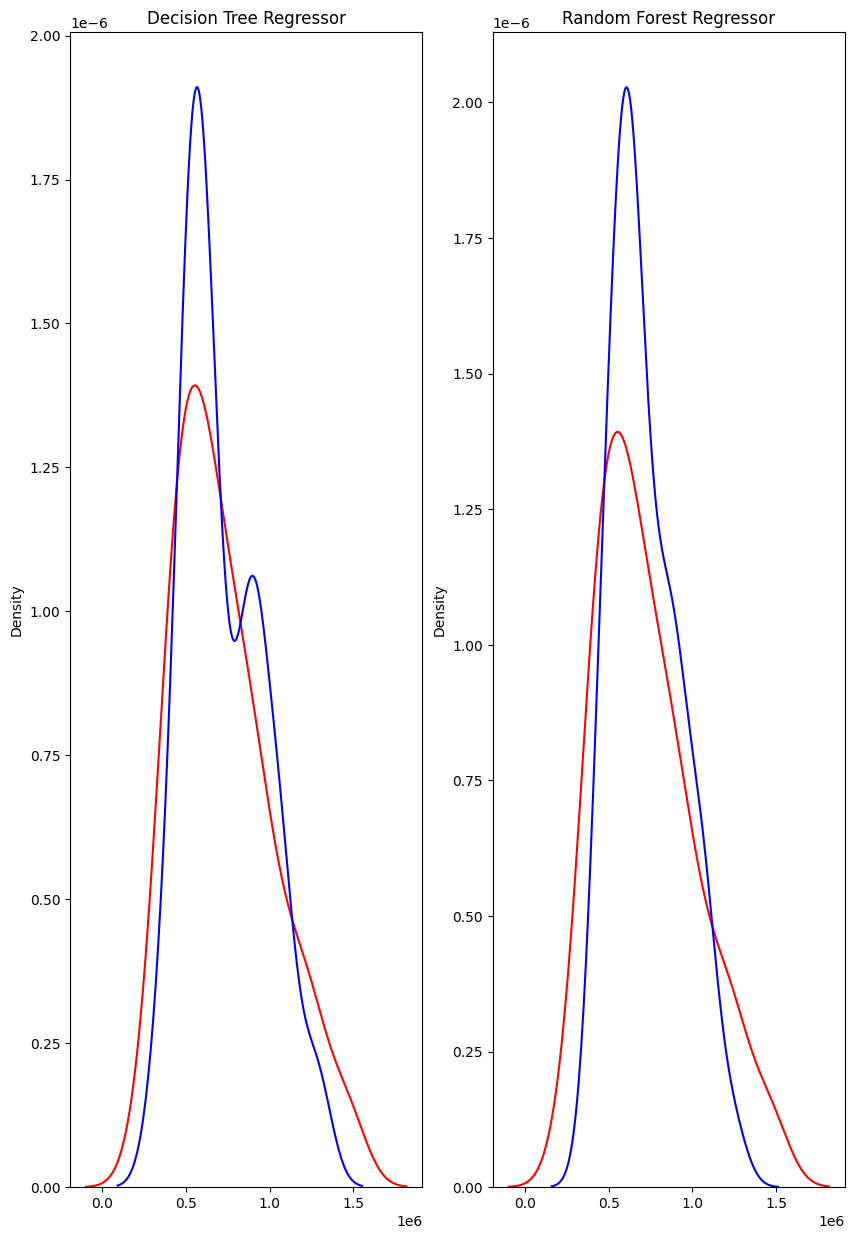

In [69]:
#Distribution plot

fig,ax = plt.subplots(1,2,figsize = (10,15))

#decision tree regressor
sns.distplot(x=y_test,ax=ax[0],color ='r',hist = False,label ='Actual').set_title("Decision Tree Regressor")
sns.distplot(dtr_pred,ax=ax[0],color ='b',hist = False,label ='Predicted')


#Random Forest Regressor
sns.distplot(x=y_test,ax=ax[1],color ='r',hist = False,label ='Actual').set_title("Random Forest Regressor")
sns.distplot(rfr_pred,ax=ax[1],color ='b',hist = False,label ='Predicted')


Model Metrics

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Decision Tree Regressor

print('Decision Tree Regressor')
print('MAE:',mean_absolute_error(y_test,dtr_pred))
print('MSE:',mean_squared_error(y_test,dtr_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,dtr_pred)))
print('R2 Score:',r2_score(y_test,dtr_pred))

#Random Forest Regressor

print('Random Forest Regressor')
print('MAE:',mean_absolute_error(y_test,rfr_pred))
print('MSE:',mean_squared_error(y_test,rfr_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,rfr_pred)))
print('R2 Score:',r2_score(y_test,rfr_pred))

Decision Tree Regressor
MAE: 160519.043132201
MSE: 40825602088.42557
RMSE: 202053.4634408071
R2 Score: 0.5189477688902654
Random Forest Regressor
MAE: 143198.68950728423
MSE: 35305685045.57076
RMSE: 187898.07089369162
R2 Score: 0.5839895140984462


Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

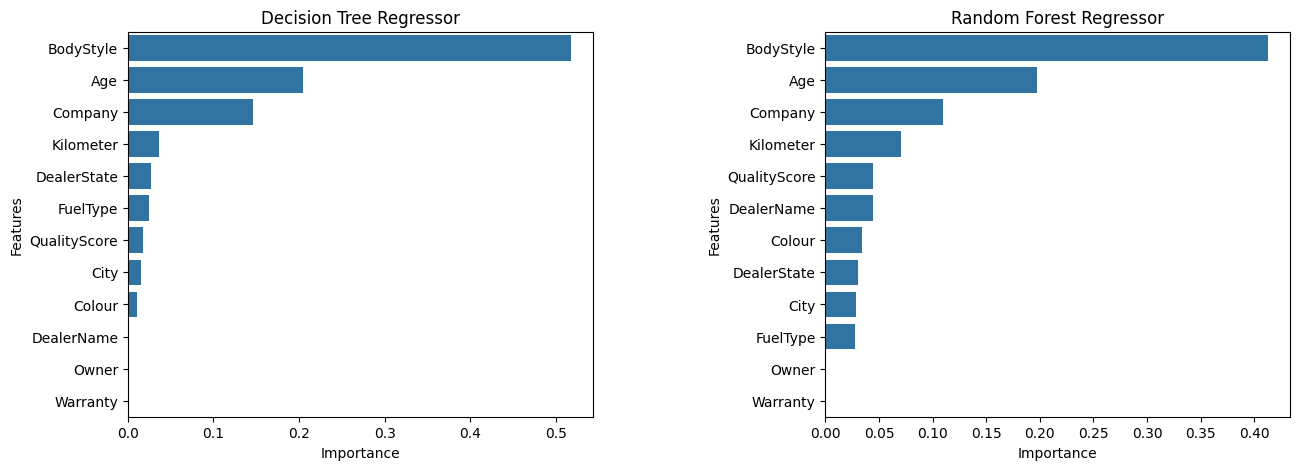

In [72]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.subplots_adjust(wspace =0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns,'Importance':dtr.feature_importances_})
feature_df = feature_df.sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y='Features',data=feature_df,ax=ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns,'Importance':rfr.feature_importances_})
feature_df = feature_df.sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y='Features',data=feature_df,ax=ax[1]).set_title('Random Forest Regressor')

**Conclusion**

From the exploratory data analysis, I have revealed two major facts about the used car market: which are demand and price. The demand of low price used car is pretty high as compared to the to expensive ones, which highlights the customers attraction towards budget cars. But upon studying the graph I also came to know about some interesting facts about the used car market. Begining with the car companies, companies like- MG, Mercedes Benz, BMW, Volvo and KIA have the highest price but Maruti Suzuki, Hyundai, Honda, Mahindra and Tata car are in higher demand. This highlights that customer prefer to buy new luxury cars instead of used ones.

Majority of the cars run either on petro or diesel, with diesel cars having slightly higher price. I als came to know that car is major player in the market. Cars like white, grey, silver and black are in higher demand but exotic colors like burgundy, riviera red, dark blue, black majic have higher price. Coming to the car's odometer reading, most of the cars have reading less than 10,000 km, and cars with lower odometer reading have the higher price.

Cars with bodystyle like HatchBack, SUV and Sedan are most preferred by the customers whereas the bodystyle like MPV, SUV and Sedan are the top most ecpensive ones. Age of the car also play a major role in its resale value. As the car age increases, it resale value decreases. Therefore, cars than age less than 5 years have higher price and prefered more. Car price aslo changes by location. Delhi, Maharashtra and Rajstan are the top three states with the highes price and Car Estate, Star Auto India and Car Choice are the top three dealers with the highest price.

Customers usually prefer the car with 1st owner type resulting in hugher demand as well as higher price. Cars that comes with a warranty provudes an assurance to the customer, resulting in a little bit higher price. The last feature i.e. Quality score also dictates the car price, where cars with higher quality score have higher price.

Coming to the machine learning models, I have used Descision tree regressor and random forest regressor to predict the car price. The random forest regressor model performed better than the decision tree regressor model. Moreover, from the feature importance graph, we can see that the car age, bodystyle and comapny are the key features that affect the car price.